## Jumpstart to Keras

The package **keras** is an abstraction layer on top of a backend. It supports Theano or Tensorflow as the backend.

In the following example, we will use Theano as the backend.

In [3]:
## keras - test the installation
import keras

## Use Theano as backend.
## update the backend entry to "theano" in the ~/.keras/keras.json file.
print(keras.__file__)

/Users/admin/anaconda/lib/python2.7/site-packages/keras/__init__.pyc


In [44]:
## Keras provides an abstraction on top of backend - Theano or Tensorflow.
##
## Using Python 2.7.12, Theano 0.8.2, Keras 1.2.0 
## import the needed modules
import numpy as np
import pandas as pd

import cv2 #open cv


import matplotlib.pyplot as plt  #for ploting

#to connect notebook to GUI loop
%matplotlib inline     

# models - sequential provides a linear stack of layers.
from keras.models import Sequential

#get the "core" layers from keras
## Dense      : is a fully connected NN layer
## Dropout    : to prevent overfitting, drop out some of the connections from input to output
## Activation : applies activation function to the output layer
## Flatten    : flatten the inputs?
from keras.layers import Dense, Dropout, Activation, Flatten

#get the CNN layers
from keras.layers import Convolution2D, MaxPooling2D



In [10]:
#print the configuration
print np.__version__
print pd.__version__
print keras.__version__

np.random.seed(234)

1.11.1
0.18.1
1.2.0


## Read the images

In [ ]:
## just pick few images for both cat & dog from train, as running it local machine

#pick three random numbers from 0 to 12499.
img_index_arr = np.random.randint(0, 12999, 3)
img_index_arr

TRAIN_DIR = "/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/"
train_images = []

for idx in range(len(img_index_arr)):
    #print img_index_arr[idx]
    cat_image_name = "cat." + str(img_index_arr[idx]) + ".jpg"
    dog_image_name = "dog." + str(img_index_arr[idx]) + ".jpg"
    #print cat_image_name, dog_image_name
    train_images.append(TRAIN_DIR+cat_image_name)
    train_images.append(TRAIN_DIR+dog_image_name)
    
train_images



In [ ]:
TEST_DIR = "/Users/admin/myData/DataScience/CatsVsDogs/datasets/test/"
test_images= []

#test_images = [TEST_DIR+i for i in os.listdir(TESTDIR)]
# load only few test images.
for i in range(5)
   print i

In [59]:
# input : color image of size 499x375

#resize to 64x64, 

ROWS = 64
COLUMNS = 64
CHANNELS = 3 #RGB

# read image cv and resize input image
def read_n_resize(image_location):
    img = cv2.imread(image_location, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLUMNS), interpolation=cv2.INTER_CUBIC)


# function to read image
def read_images(image_list) :
    count = len(image_list)
    # create N dimensional array
    image_arr = np.ndarray(shape = (count, CHANNELS, ROWS, COLUMNS), dtype= np.uint8)
    
    for i, image_path in enumerate(image_list):
       print(i, image_path)
       image = read_n_resize(image_path)
       image_arr[i] = image.T
    
    return image_arr
    
train = read_images(train_images)
print "train : {}" .format(train.shape)

(0, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.151.jpg')
(1, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.151.jpg')
(2, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.8335.jpg')
(3, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.8335.jpg')
(4, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.7785.jpg')
(5, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.7785.jpg')
train : (6, 3, 64, 64)


### Open and examine the images

0


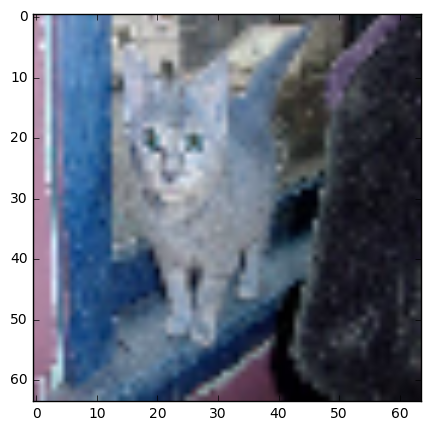

1


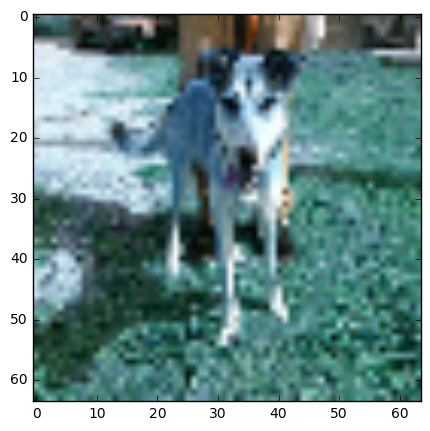

2


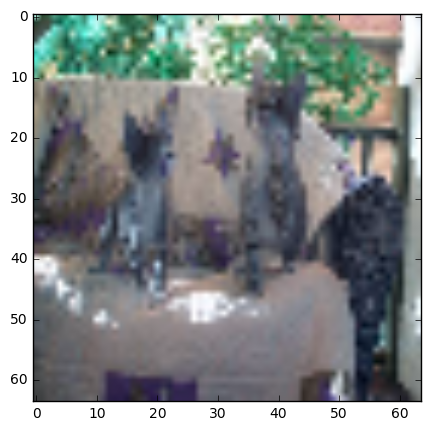

3


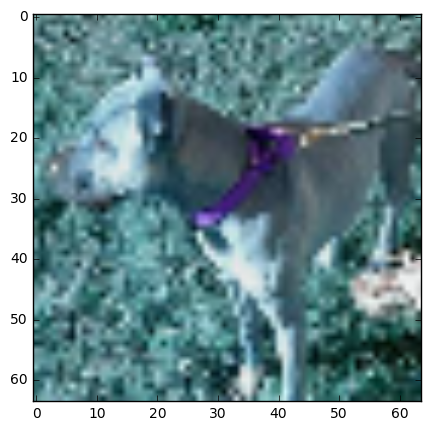

4


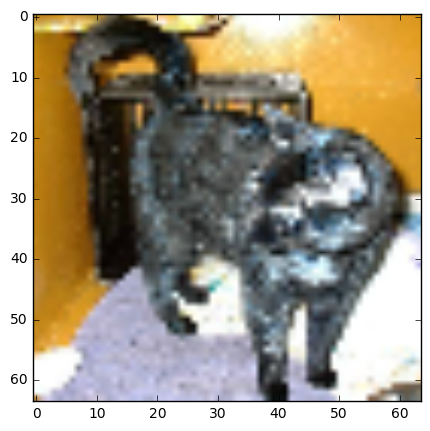

5


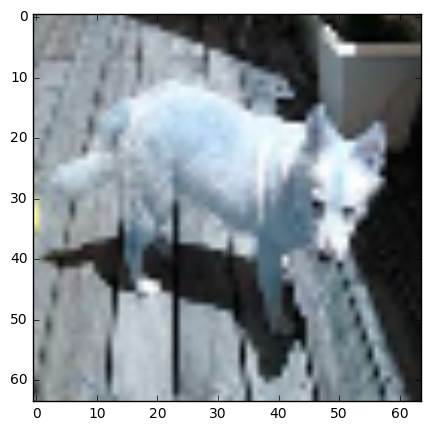

In [58]:
# display the images
for i in range(len(train_images)):
    print i
    plt.figure(figsize = (10,5))
    plt.imshow(read_n_resize(train_images[i]))
    plt.show()
    

### Generate the labels
It's is a classification problem. Tag 1 for dog and 0 for cat.

In [67]:
labels = []

for i, image_path in enumerate(train_images):
    print(i, image_path)
    if 'dog' in image_path:
       labels.append(1)
    else:
       labels.append(0)

labels

(0, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.151.jpg')
(1, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.151.jpg')
(2, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.8335.jpg')
(3, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.8335.jpg')
(4, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/cat.7785.jpg')
(5, '/Users/admin/myData/DataScience/CatsVsDogs/datasets/train/dog.7785.jpg')


[0, 1, 0, 1, 0, 1]

###  Build Model based on VGG16 Net

[Refer to Keras pre trained VGG16 model](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3)

[CNN @ Stanford](http://cs231n.github.io/convolutional-networks/)

[Rectified Linear Unit is preferred over sigmoid/tanh](http://cs231n.github.io/neural-networks-1/)

In [ ]:
# build the model

#stack up the layers usind .add()
    
# apply 3x3 convolution with 32 output filters on 64x64 input image
#
# this is the first convolution layer, so specify the input_shape()
# input is 3 layers (RGB) of 64x64, so input_shape(3,64,64)
#
# border_mode:same/valid/full ?
# activation : instead of linear, use rectified linear unit.
#
# MaxPooling is one way to reduce the number of parameters.
# in this case, run 2x2 filter and pick the max number amoung them.
#
# Flatten:
#
# Dropout: will reduce the overfit. It is a regularizing parameter.
#
#
def build_cat_dog_model():
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, ROWS, COLUMNS), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=0.0001), metrics=['accuracy'])
    return model


model = build_cat_dog_model()


## Use Custom callback to track the model

In [ ]:

# extend the class from keras callback
## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        


In [ ]:

nb_epoch = 10
batch_size = 16

# fit the model 
# register the callback
history = LossHistory()
model.fit(train, labels, batch_size=batch_size, nb_epoch=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])

# do the predictions
predictions = model.predict(test, verbose=0)

print history.losses

## Examine the results

In [ ]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()